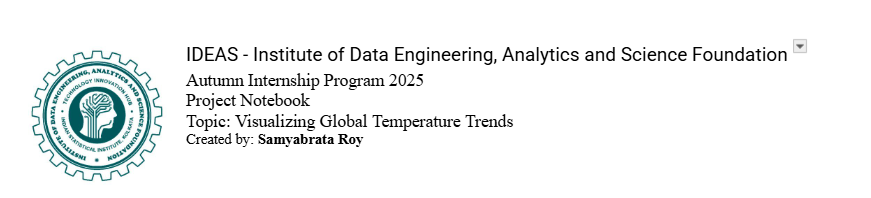

📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.
Here are a couple of questions for you to think about (and maybe discuss!):

1. What do you understand by Time-Series Data?
(Hint: Think about data that is recorded over time — like daily sales data.)

2. Do you think choosing Python as our programming language for this analysis is a good decision?
Feel free to share your honest opinion — there’s no right or wrong answer here!

Introduction

⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.
In the next coding cell, we’ll load the COVID-19 dataset directly from Google Drive (shared with public view access).

Once the file is loaded, we’ll print the first few rows so that we can get a quick look at what the dataset contains before moving into analysis and visualization.

In [2]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)

    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


Task:
What if the dataset was not available in any only repo or not hosted anywhere? How can you upload a dataset from your local machine? Code it

In [7]:
from google.colab import files
import pandas as pd
import io

# Upload file from local machine
uploaded = files.upload()

# Check the uploaded file names
for filename in uploaded.keys():
    print("Uploaded file:", filename)
    # Load the uploaded file dynamically
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(df.head())


Saving monthly_csv.csv to monthly_csv (2).csv
Uploaded file: monthly_csv (2).csv
    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


EDA including visualization

Plot 1:
Monthly Revenue Over Time

Visualizing monthly avg temparature obtaining from 2 different sources, which will help helps us understand trends across the years.
Are there peaks during certain months (like due to any particular season)? Let’s find out.

In [9]:
print(df.columns)
print(df.head())


Index(['Source', 'Date', 'Mean'], dtype='object')
    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


In [10]:
# If there's a 'Date' column instead of 'Year'
df['Year'] = pd.to_datetime(df['Date']).dt.year


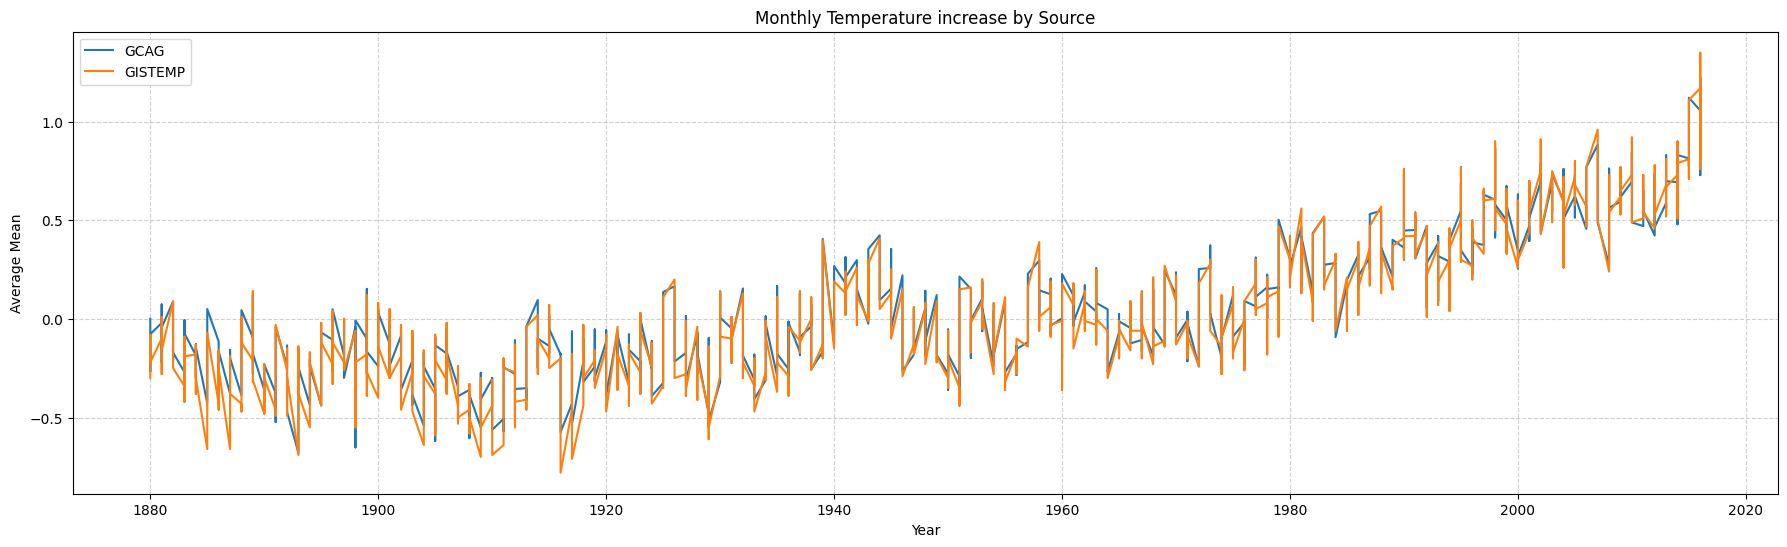

In [11]:
import matplotlib.pyplot as plt

# Check if 'Year' exists, otherwise create it from 'Date'
if 'Year' not in df.columns:
    if 'Date' in df.columns:
        df['Year'] = pd.to_datetime(df['Date']).dt.year
    else:
        raise ValueError("No 'Year' or 'Date' column found in dataset")

# Plot line chart
plt.figure(figsize=(22,6))
for source in df['Source'].unique():
    subset = df[df['Source'] == source]
    plt.plot(subset['Year'], subset['Mean'], label=source)

plt.title("Monthly Temperature increase by Source")
plt.xlabel("Year")
plt.ylabel("Average Mean")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Plot 2:
12 Months Moving Average

Smoothing out seasonal fluctuations and short-term variations to reveal the underlying long-term temperature trends. The 12-month moving average provides a clearer view of climate patterns by averaging each month with the 11 months surrounding it, making it easier to identify gradual warming or cooling trends over the years.

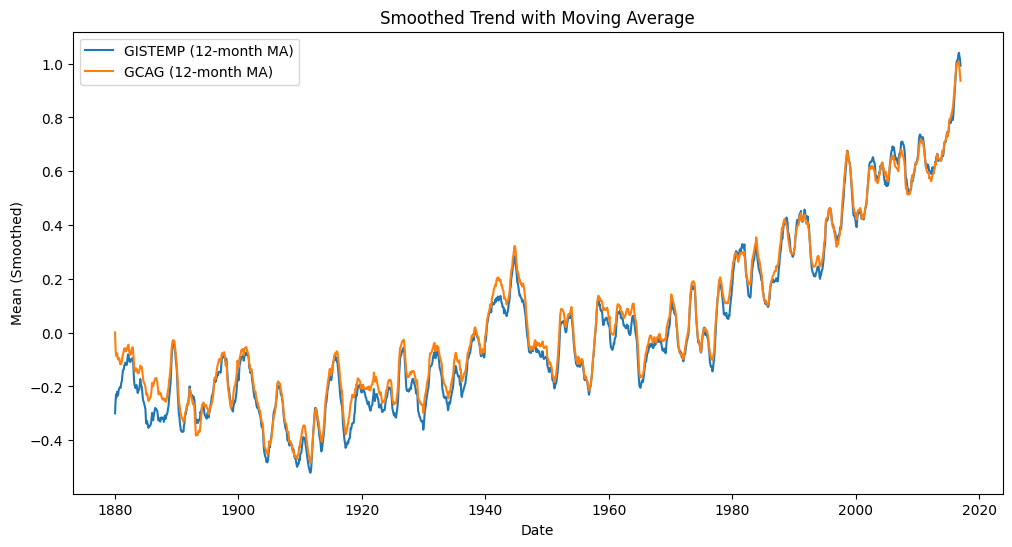

In [12]:
# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Calculate moving average (e.g., 12-month window)
df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot moving average
plt.figure(figsize=(12,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Moving_Avg'], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()

Q. How would you interpet this?

Construct another line plot by taking any one of the souces in count and try to smooth-out the variation more and try to come up with a trend

In [13]:
df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].dt.year

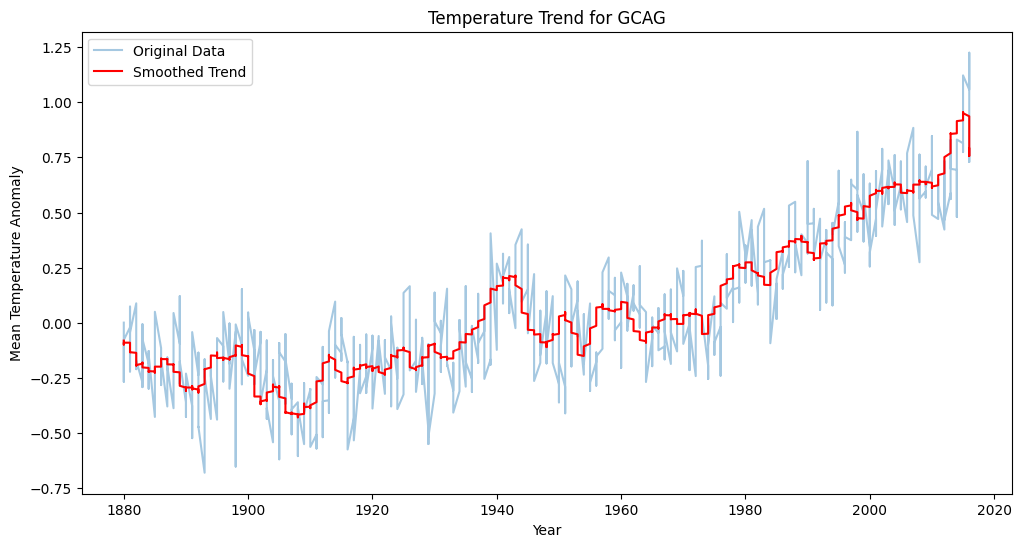

In [14]:
source = "GCAG"
subset = df[df["Source"] == source].copy()

# Smooth (36-month moving average)
subset["Smoothed"] = subset["Mean"].rolling(window=36, min_periods=1).mean()

plt.figure(figsize=(12,6))
plt.plot(subset["Year"], subset["Mean"], alpha=0.4, label="Original Data")
plt.plot(subset["Year"], subset["Smoothed"], color="red", label="Smoothed Trend")
plt.title(f"Temperature Trend for {source}")
plt.xlabel("Year")
plt.ylabel("Mean Temperature Anomaly")
plt.legend()
plt.show()

Plot 3
Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

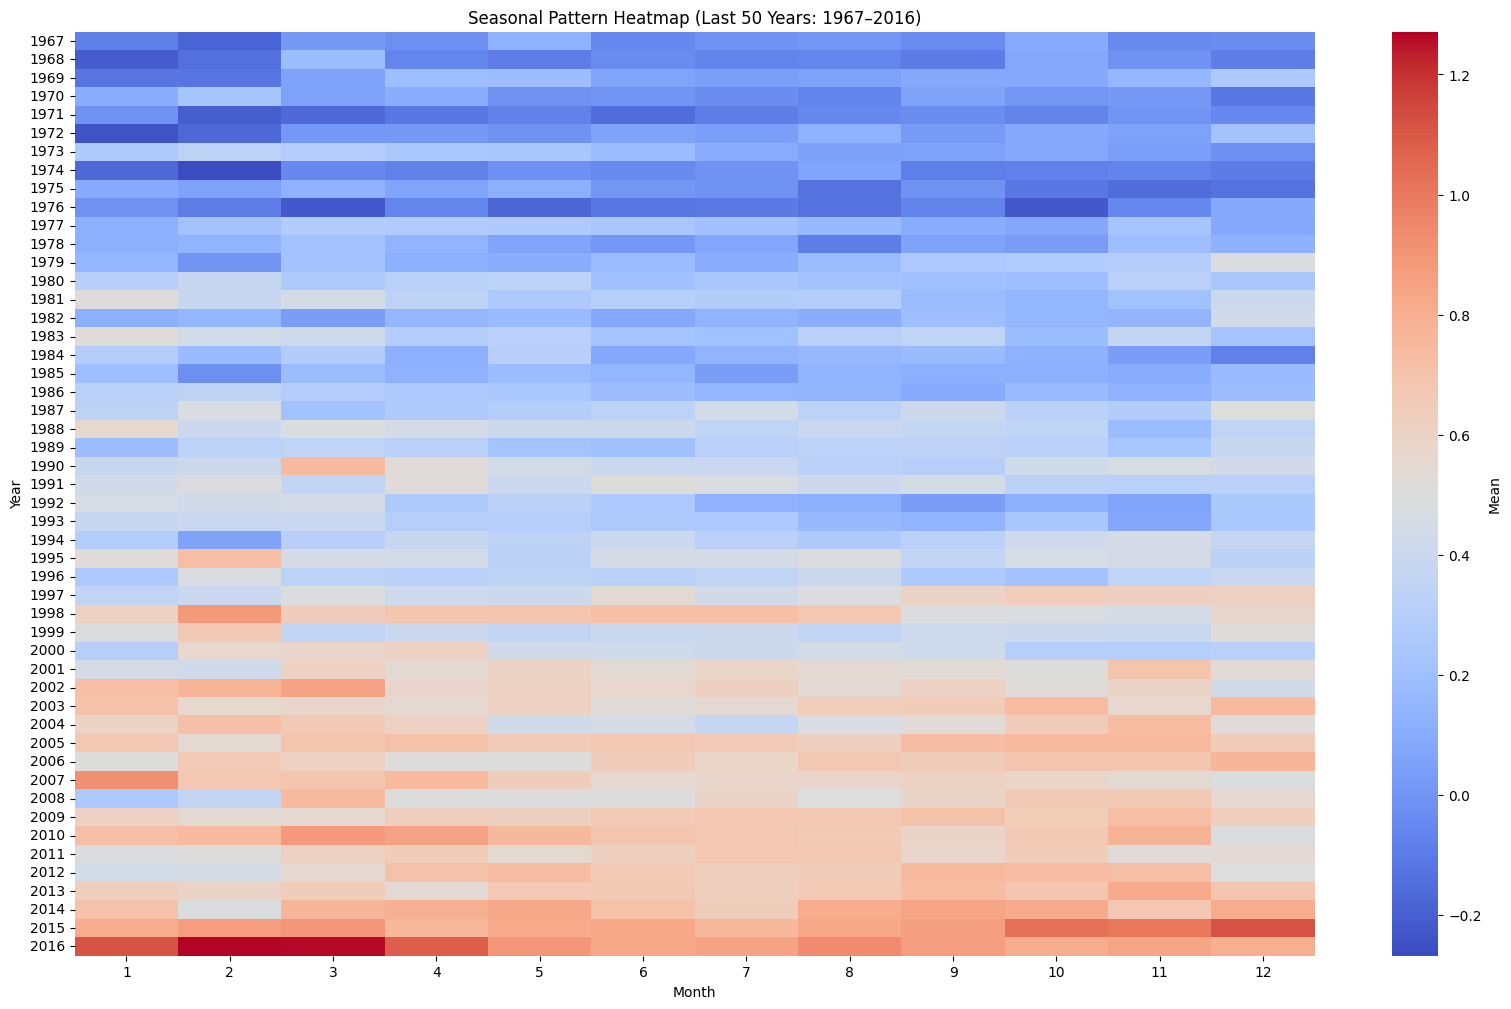

In [15]:
# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


Q. How about we try to visualize last 20 years rather? Construct the plot

Task:

What type of charts could have served the same purpose done in plot 3? Plot any one of them (apart from heatmap) and visualize seasonal variation

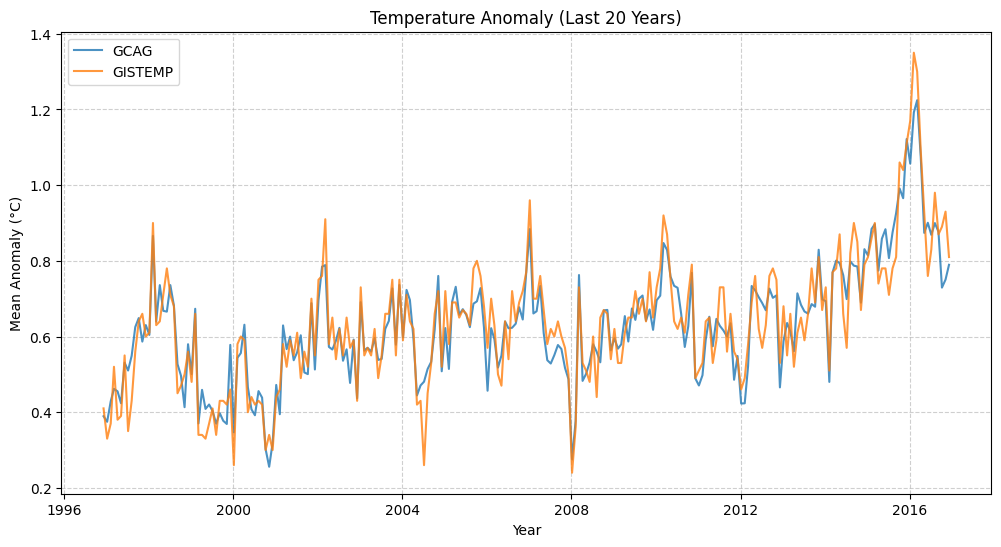

/tmp/ipython-input-2425702440.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Month", y="Mean", data=df, inner="box", palette="Set2")


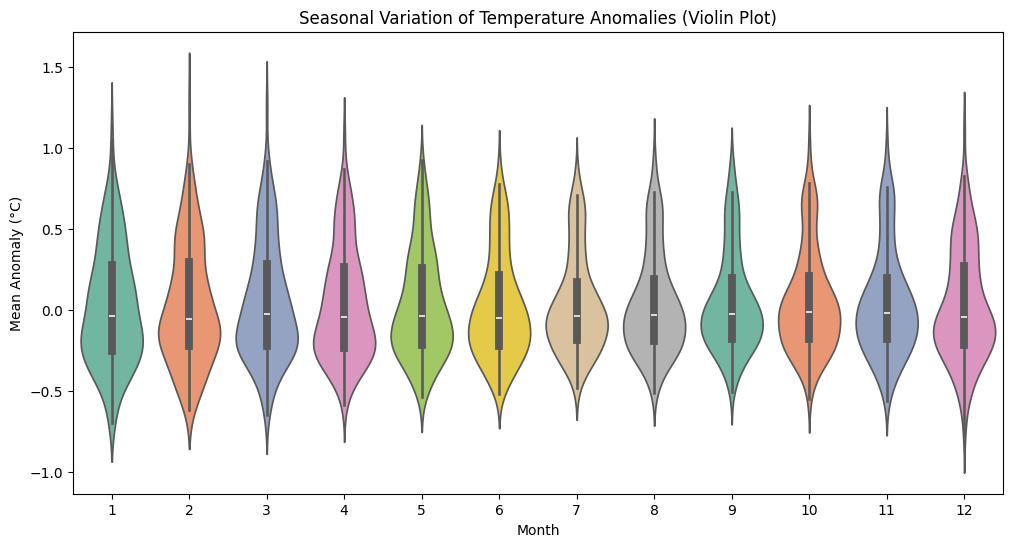

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Date column properly
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# --- Plot 1: Last 20 years (line plot) ---
cutoff_date = df['Date'].max() - pd.DateOffset(years=20)
df_last20 = df[df['Date'] >= cutoff_date]

plt.figure(figsize=(12, 6))
for source in df_last20['Source'].unique():
    subset = df_last20[df_last20['Source'] == source]
    plt.plot(subset['Date'], subset['Mean'], label=source, alpha=0.8)

plt.title("Temperature Anomaly (Last 20 Years)")
plt.xlabel("Year")
plt.ylabel("Mean Anomaly (°C)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- Plot 2: Seasonal variation with violin plot ---
plt.figure(figsize=(12, 6))
sns.violinplot(x="Month", y="Mean", data=df, inner="box", palette="Set2")

plt.title("Seasonal Variation of Temperature Anomalies (Violin Plot)")
plt.xlabel("Month")
plt.ylabel("Mean Anomaly (°C)")
plt.show()


Assignment:
Find a similar dataset from any public repository or constrt a synthetic data from www.syngendata.ai and perform similart analysis to draw inference

From Section 1 to Section 9 in this Assignment
I did

 Data Loading & Preprocessing

Load dataset (Delhi & London)

Handle missing values

Convert dates to Year, Month

Create yearly averages

Trend Analysis (Linear Regression)

Apply scipy.stats.linregress

Calculate warming trends for Delhi & London

Print slopes (°C/year)

Feature Engineering

Select features: Year, Month

Target: AverageTemperature

Train-Test Split

Split data into train & test sets

Model Training (Random Forest Regressor)

Train Random Forest on Delhi data

Model Evaluation (Regression Metrics)

R² Score

RMSE

MAE

Visualization: Actual vs Predicted (Delhi)

Line or scatter plot of predictions

Convert Regression to Classification

Define temperature bins (e.g., Cold / Moderate / Hot)

Convert y_test and y_pred into categories

Confusion Matrix & Accuracy

Compute confusion matrix

Plot heatmap with labels

Print Accuracy %

In [17]:
from google.colab import files

# Upload CSV (it will prompt you to select a file from your computer)
uploaded = files.upload()

Saving BerkeleyEarth.csv to BerkeleyEarth.csv


In [18]:
import zipfile

with zipfile.ZipFile("BerkeleyEarth.csv", "r") as z:
    z.extractall("berkeley_data")

import os
print(os.listdir("berkeley_data"))


df = pd.read_csv("berkeley_data/GlobalLandTemperaturesByCity.csv")
print(df.shape)
df.head()


['GlobalLandTemperaturesByCountry.csv', 'GlobalLandTemperaturesByMajorCity.csv', 'GlobalLandTemperaturesByState.csv', 'GlobalTemperatures.csv', 'GlobalLandTemperaturesByCity.csv']
(8599212, 7)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [19]:
df['dt'] = pd.to_datetime(df['dt'])
df_recent = df[df['dt'] >= "2000-01-01"]


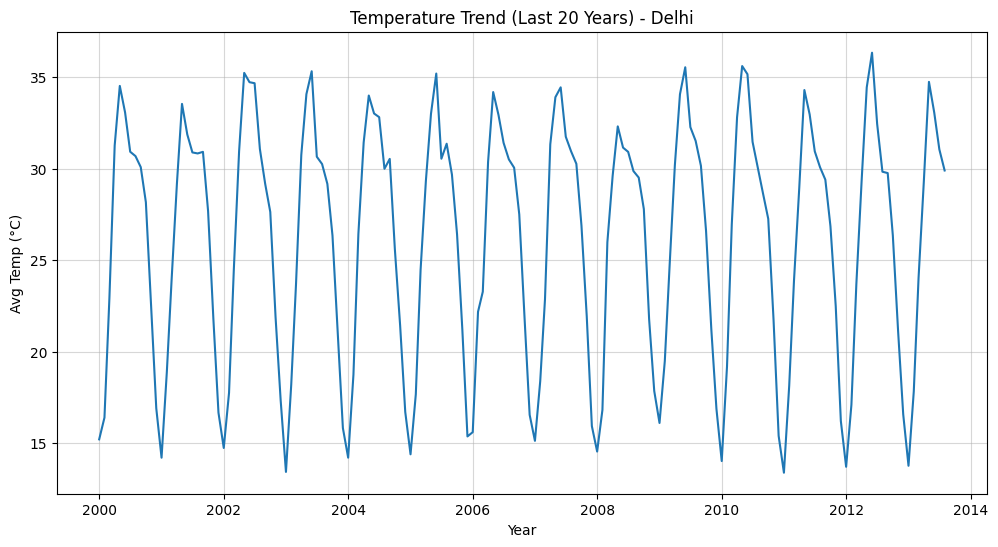

In [20]:
import matplotlib.pyplot as plt

city_data = df_recent[df_recent["City"]=="Delhi"]
plt.figure(figsize=(12,6))
plt.plot(city_data["dt"], city_data["AverageTemperature"])
plt.title("Temperature Trend (Last 20 Years) - Delhi")
plt.xlabel("Year")
plt.ylabel("Avg Temp (°C)")
plt.grid(True, alpha=0.5)
plt.show()


/tmp/ipython-input-2286249335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent["Month"] = df_recent["dt"].dt.month


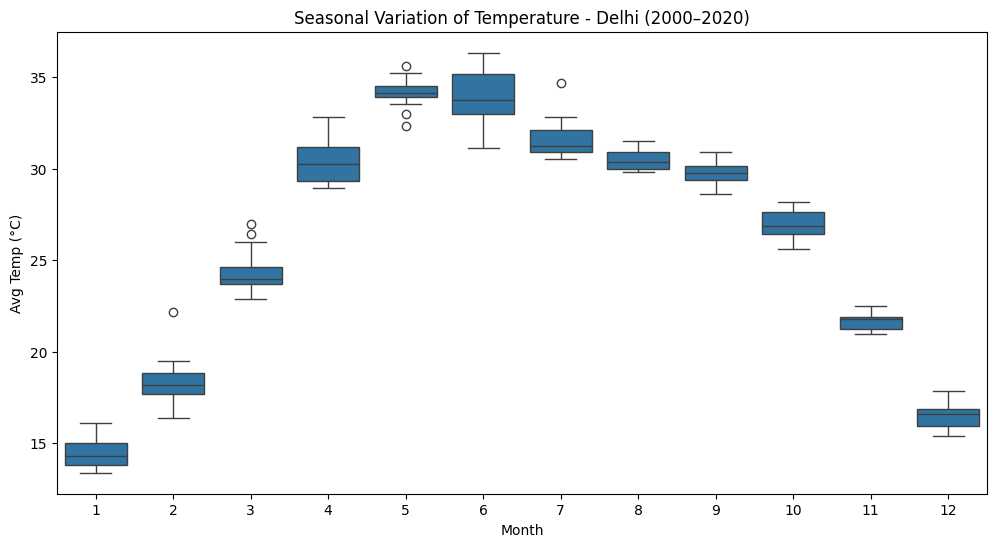

In [21]:
import seaborn as sns

df_recent["Month"] = df_recent["dt"].dt.month
plt.figure(figsize=(12,6))
sns.boxplot(x="Month", y="AverageTemperature", data=df_recent[df_recent["City"]=="Delhi"])
plt.title("Seasonal Variation of Temperature - Delhi (2000–2020)")
plt.xlabel("Month")
plt.ylabel("Avg Temp (°C)")
plt.show()


In [23]:
df_recent = df_recent.copy()
df_recent["Month"] = df_recent["dt"].dt.month


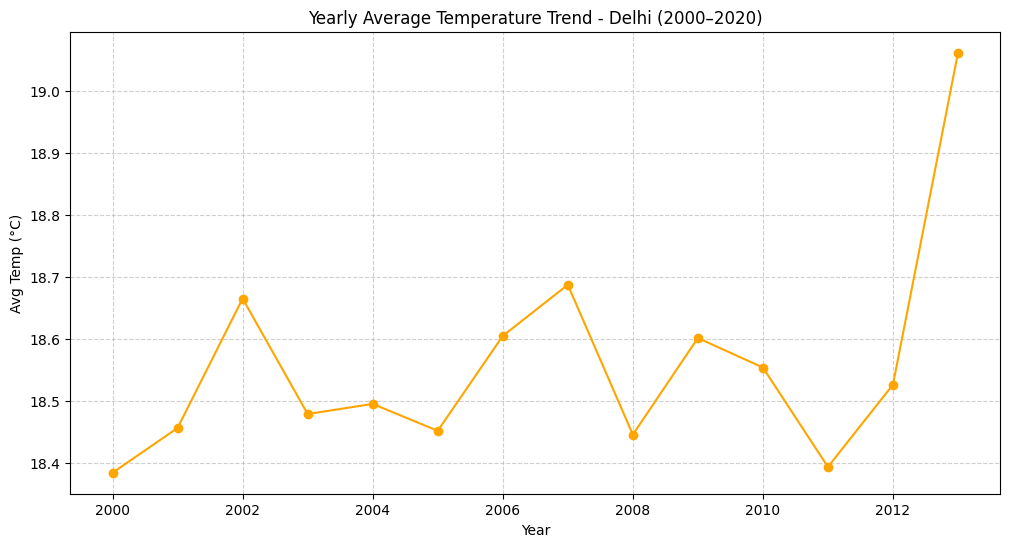

In [24]:
# Compute yearly average
df_recent["Year"] = df_recent["dt"].dt.year
df_yearly = df_recent.groupby("Year")["AverageTemperature"].mean().reset_index()

# Plot trend
plt.figure(figsize=(12,6))
plt.plot(df_yearly["Year"], df_yearly["AverageTemperature"], marker="o", color="orange")
plt.title("Yearly Average Temperature Trend - Delhi (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Avg Temp (°C)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


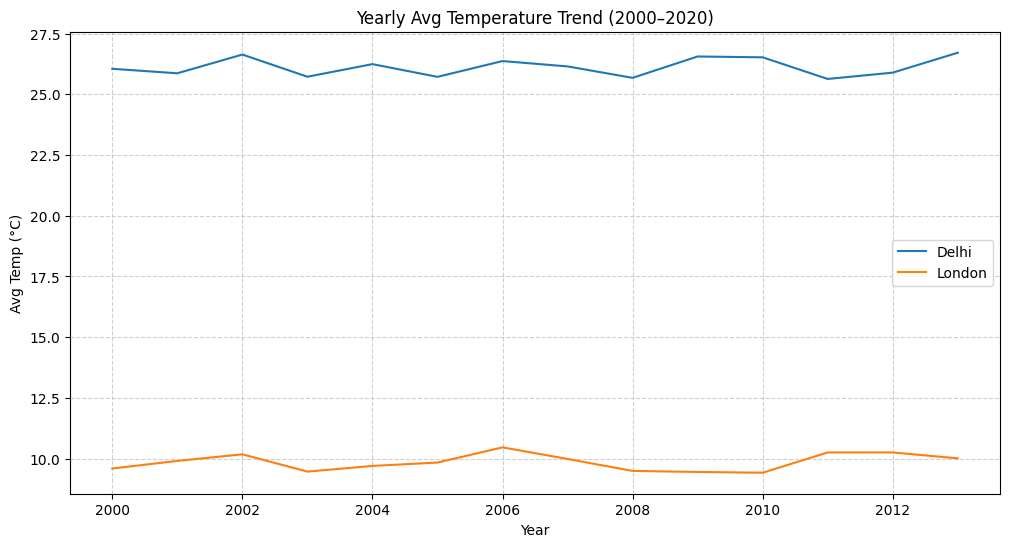

In [25]:
cities = ["Delhi", "London"]

plt.figure(figsize=(12,6))
for city in cities:
    df_city = df[(df["City"] == city) & (df["dt"].dt.year >= 2000) & (df["dt"].dt.year <= 2020)].copy()
    df_city["Year"] = df_city["dt"].dt.year
    df_yearly = df_city.groupby("Year")["AverageTemperature"].mean().reset_index()
    plt.plot(df_yearly["Year"], df_yearly["AverageTemperature"], label=city)

plt.title("Yearly Avg Temperature Trend (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Avg Temp (°C)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


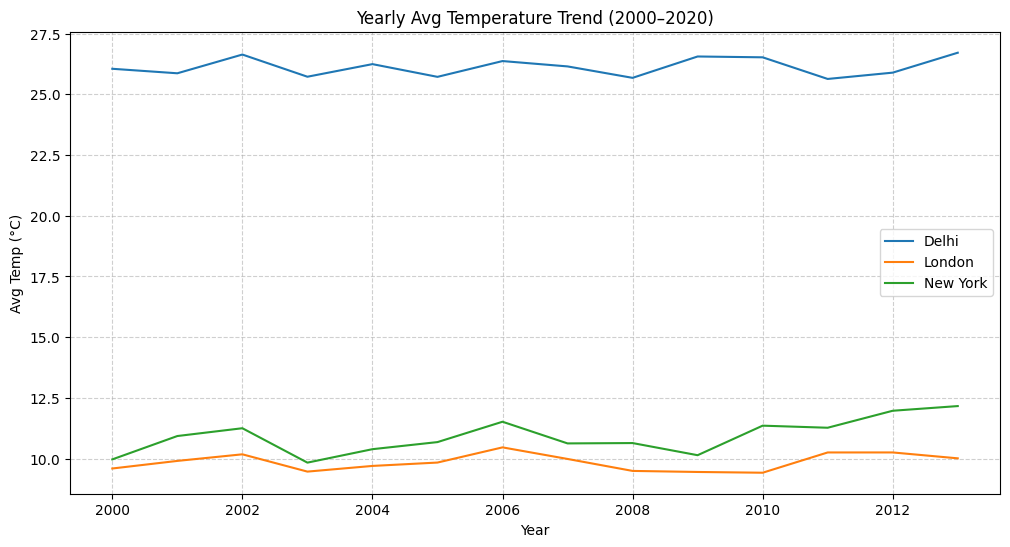

In [26]:
cities = ["Delhi", "London", "New York"]

plt.figure(figsize=(12,6))
for city in cities:
    df_city = df[(df["City"] == city) & (df["dt"].dt.year >= 2000) & (df["dt"].dt.year <= 2020)].copy()
    df_city["Year"] = df_city["dt"].dt.year
    df_yearly = df_city.groupby("Year")["AverageTemperature"].mean().reset_index()
    plt.plot(df_yearly["Year"], df_yearly["AverageTemperature"], label=city)

plt.title("Yearly Avg Temperature Trend (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Avg Temp (°C)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


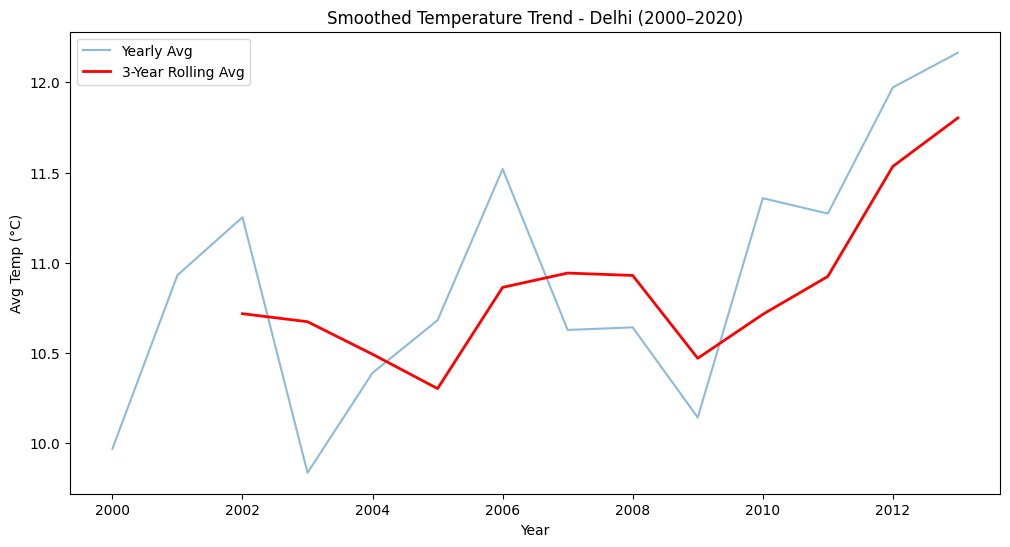

In [27]:
df_yearly["RollingMean"] = df_yearly["AverageTemperature"].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(df_yearly["Year"], df_yearly["AverageTemperature"], label="Yearly Avg", alpha=0.5)
plt.plot(df_yearly["Year"], df_yearly["RollingMean"], label="3-Year Rolling Avg", linewidth=2, color="red")
plt.title("Smoothed Temperature Trend - Delhi (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Avg Temp (°C)")
plt.legend()
plt.show()


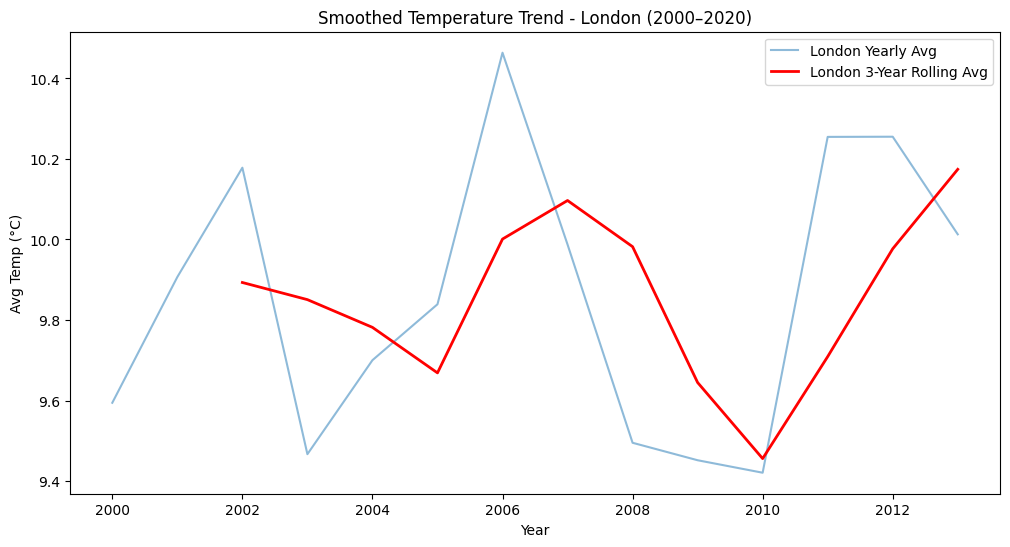

In [28]:
df_london = df[(df["City"]=="London") & (df["dt"].dt.year >=2000) & (df["dt"].dt.year<=2020)].copy()
df_london["Year"] = df_london["dt"].dt.year
df_london_yearly = df_london.groupby("Year")["AverageTemperature"].mean().reset_index()
df_london_yearly["RollingMean"] = df_london_yearly["AverageTemperature"].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(df_london_yearly["Year"], df_london_yearly["AverageTemperature"], label="London Yearly Avg", alpha=0.5)
plt.plot(df_london_yearly["Year"], df_london_yearly["RollingMean"], label="London 3-Year Rolling Avg", color="red", linewidth=2)
plt.title("Smoothed Temperature Trend - London (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Avg Temp (°C)")
plt.legend()
plt.show()


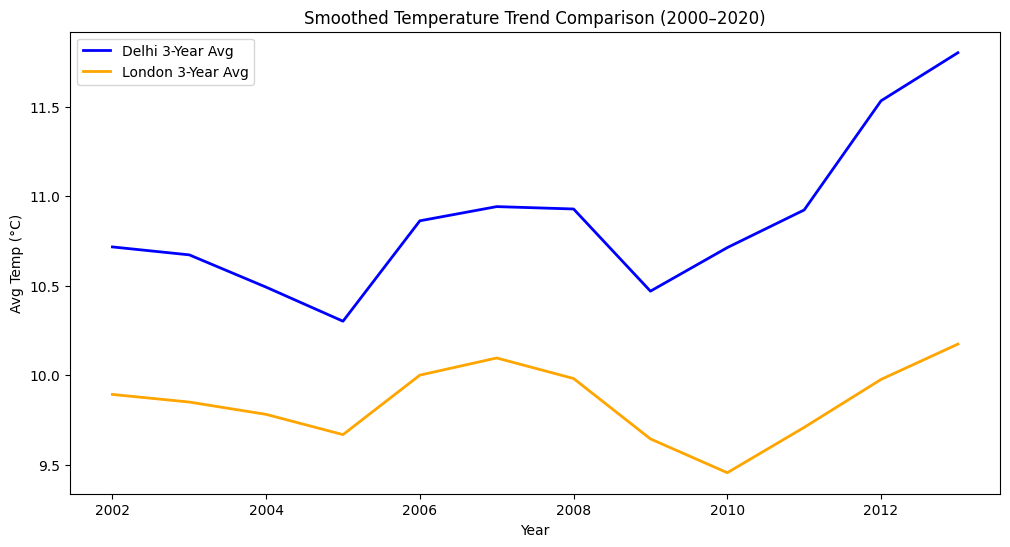

In [29]:
plt.figure(figsize=(12,6))

plt.plot(df_yearly["Year"], df_yearly["RollingMean"], label="Delhi 3-Year Avg", color="blue", linewidth=2)
plt.plot(df_london_yearly["Year"], df_london_yearly["RollingMean"], label="London 3-Year Avg", color="orange", linewidth=2)

plt.title("Smoothed Temperature Trend Comparison (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Avg Temp (°C)")
plt.legend()
plt.show()


In [52]:
# Assuming your main dataframe is called df and it has a "City" column
df_delhi = df[df['City'] == 'Delhi'].copy()

# Now you can safely create features
X_delhi = df_delhi[['Year', 'Month']]
y_delhi = df_delhi['AverageTemperature']


In [53]:
df_london = df[df['City'] == 'London'].copy()

X_london = df_london[['Year', 'Month']]
y_london = df_london['AverageTemperature']


In [55]:
# Drop rows where AverageTemperature is NaN
df_delhi = df_delhi.dropna(subset=['AverageTemperature'])

# Define features and target again
X_delhi = df_delhi[['Year', 'Month']]
y_delhi = df_delhi['AverageTemperature']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_delhi, y_delhi, test_size=0.2, random_state=42)

# Train Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_delhi = RandomForestRegressor(n_estimators=200, random_state=42)
rf_delhi.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("Delhi R²:", r2_score(y_test, y_pred))




Delhi R²: 0.9714845643113593


Delhi R²: 0.9714845643113593
Delhi RMSE: 1.1198186599932638
Delhi MAE: 0.8819367014613803


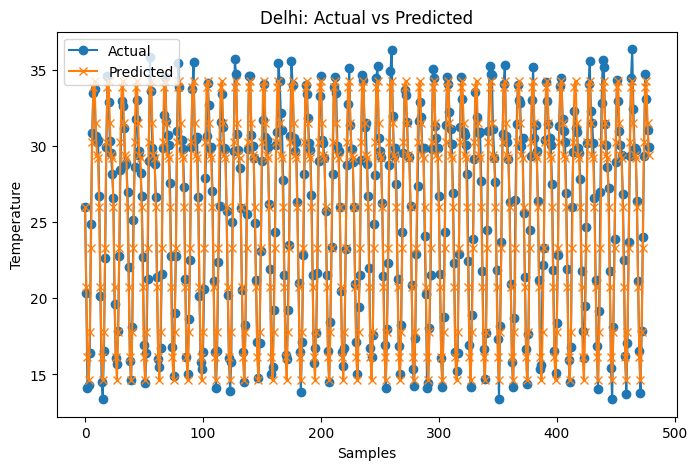

In [62]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# R²
print("Delhi R²:", r2_score(y_test, y_pred))

# RMSE (compute manually)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Delhi RMSE:", rmse)

# MAE (optional, extra metric)
mae = mean_absolute_error(y_test, y_pred)
print("Delhi MAE:", mae)

# Plot: Actual vs Predicted
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.title("Delhi: Actual vs Predicted")
plt.xlabel("Samples")
plt.ylabel("Temperature")
plt.legend()
plt.show()


Accuracy: 83.29853862212944 %


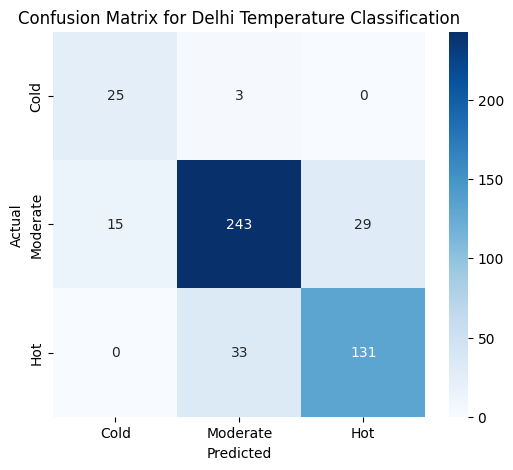

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Example bins for temperature classification
bins = [-np.inf, 15, 30, np.inf]
labels = ["Cold", "Moderate", "Hot"]

# Convert continuous values to categories
y_test_cat = np.digitize(y_test, bins)
y_pred_cat = np.digitize(y_pred, bins)

# Confusion Matrix
cm = confusion_matrix(y_test_cat, y_pred_cat)

# Accuracy
acc = accuracy_score(y_test_cat, y_pred_cat)
print("Accuracy:", acc * 100, "%")

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Delhi Temperature Classification")
plt.show()
